<a href="https://colab.research.google.com/github/Joseph-Maulin/DS-Unit-1-Sprint-2-Statistics/blob/master/Copy_of_Copy_of_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 122
## Sampling, Confidence Intervals, and Hypothesis Testing

## Recap: t-tests

In [0]:
# imports
from scipy.stats import ttest_ind, ttest_1samp
import pandas as pd
import numpy as np

In [0]:
url='https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv'

In [6]:
df = pd.read_csv(url, na_values=" ?")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.shape

(32561, 15)

In [8]:
# Remove null values as these will throw off the ttest
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [0]:
df = df.dropna(how='any')


In [10]:
print(df.shape)
df.isnull().sum()

(30162, 15)


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [11]:
# salary values
df['salary'].value_counts()

 <=50K    22654
 >50K      7508
Name: salary, dtype: int64

In [13]:
# data cleaning
df['salary'].value_counts().index

Index([' <=50K', ' >50K'], dtype='object')

In [24]:
## what is the average age?
popmean = df['age'].mean()
popmean

38.437901995888865

In [0]:
# restrict to high earners
hibucks = df[df['salary']==' >50K']

In [19]:
hibucks.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K


In [20]:
# is age continuous?
df['age'].describe()

count    30162.000000
mean        38.437902
std         13.134665
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

In [25]:
# is the average age of high earners above the population average? yes.
ttest_1samp(hibucks['age'], popmean, nan_policy='omit')

Ttest_1sampResult(statistic=46.584490111990384, pvalue=0.0)

In [0]:
# is there a sig difference between the age of high and low earners? yes.
lobucks = df[df['salary']==' <=50K']

In [28]:
lobucks.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [29]:
print(hibucks['age'].mean(), lobucks['age'].mean())

43.95911028236548 36.60806038668668


In [27]:
ttest_ind(hibucks['age'], lobucks['age'], nan_policy='omit')

Ttest_indResult(statistic=43.31437788497932, pvalue=0.0)

In [0]:
# subset male and female low earners
lobucks_male = lobucks[lobucks['sex']==' Male']
lobucks_female = lobucks[lobucks['sex']==' Female']


In [32]:
print(lobucks_male['age'].mean(), lobucks_female['age'].mean())

36.84139016018307 36.23171856978085


In [31]:
# is there a sig difference between the male and female low earners? yes.
ttest_ind(lobucks_male['age'], lobucks_female['age'])

Ttest_indResult(statistic=3.3132173169084167, pvalue=0.0009237379001849086)

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [42]:
# consider a crosstab. Are men and women equally distributed by salary?
gap = pd.crosstab(df['sex'], df['salary'])
gap

salary,<=50K,>50K
sex,,
Female,8670,1112
Male,13984,6396


In [43]:
# can we test that?
from scipy.stats import chisquare

chisquare(gap, axis=None)

Power_divergenceResult(statistic=11329.481466746236, pvalue=0.0)

In [0]:
 # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation


In [45]:
# an example using simple fake data that is independent
ind_obs = np.array([[1,1], [2,2]]).T
ind_obs

array([[1, 2],
       [1, 2]])

In [46]:
chisquare(ind_obs, axis=None)

Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)

In [51]:
# here's another example of dependent observations
dep_obs = np.array([[16,18,16,14,12,12],[32,24,16,28,20,24]]).T
dep_obs

array([[16, 32],
       [18, 24],
       [16, 16],
       [14, 28],
       [12, 20],
       [12, 24]])

In [49]:
chisquare(dep_obs, axis=None)

Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)

Test of Normalcy

In [0]:
# Is a distribution normal? This is a poisson distribution
mu, sigma = 0,1
sample = np.random.normal(mu, sigma, 1000)

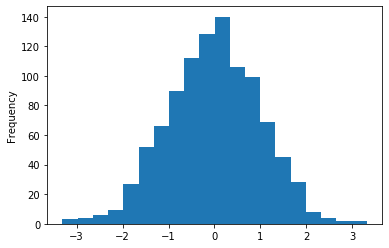

In [55]:
# Is it normal?
sample = pd.Series(sample)
sample.plot(kind='hist', bins=20);

In [56]:
df['age'].describe()

count    30162.000000
mean        38.437902
std         13.134665
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

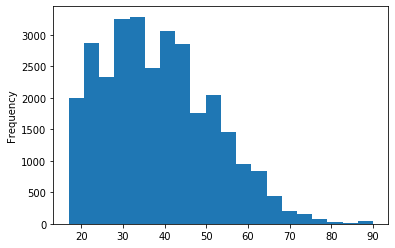

In [57]:
df['age'].plot(kind='hist', bins=20);

In [58]:
# is it normal?
from scipy.stats import normaltest
# higher than 0.05 is normal
normaltest(df['age'])

NormaltestResult(statistic=1281.0624702903629, pvalue=6.619407074534328e-279)

In [64]:
# code to format sci-notation
print('%.12f' % normaltest(df['age']).pvalue)

0.000000000000


In [0]:
# mean, std dev, number of obs



# Pretty clearly  normal

In [0]:
# display that!


In [65]:
# Poisson models arrival times and is related to the binomial (coinflip)
# poisson(mean, obvs)
fish_sample = np.random.poisson(5, 1000)
normaltest(fish_sample)
# Pretty clearly not normal

NormaltestResult(statistic=74.82929209746884, pvalue=5.636709831985496e-17)

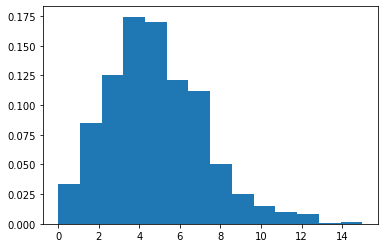

In [67]:
# display that!
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(fish_sample, 14, density=True)

And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## Central Limit Theorem



In [71]:
# mean of infinite samples of population would be normal

# Flip a coin. (n, probability)
np.random.binomial(1, .5)


1

In [78]:
# Let me flip a coin twelve times.
coinflips = np.random.binomial(1, .5, size=12)
coinflips

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1])

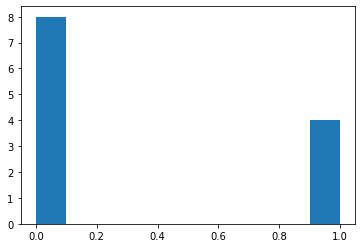

In [79]:
# show that.
plt.hist(coinflips);

In [77]:
# what is the mean of this sample of coinflips?
coinflips.mean()

0.5

In [80]:
# what if I do it again? # ran code above again
coinflips.mean()

0.3333333333333333

In [81]:
# why are these means different? shouldn't it be the same at .5 for a fair coin?
coinflips = np.random.binomial(1, .5, size=1000)
coinflips.mean()

0.508

In [86]:
coinflips = np.random.binomial(1, .5, size=10000)
coinflips.mean()

0.5037

**each of these 'samples' is an estimate of the distribution.** . 
https://www.youtube.com/watch?v=Kq7e6cj2nDw

In [87]:
# take 3000 samples of size 12, and make a list of their means.
sample_means=[]
for x in range(3000):
  coinflips = np.random.binomial(1, .5, size=12)
  sample_means.append(coinflips.mean())

print(len(sample_means))

3000


In [88]:
# look at the first 10 means.
sample_means[:10]

[0.6666666666666666,
 0.75,
 0.5,
 0.75,
 0.5,
 0.4166666666666667,
 0.5833333333333334,
 0.5833333333333334,
 0.4166666666666667,
 0.5]

In [89]:
# make a df of one sample
coin_df = pd.DataFrame({'single_sample':coinflips})
coin_df

,single_sample
0,1
1,1
2,1
3,1
4,1
5,1
6,0
7,1
8,1
9,1


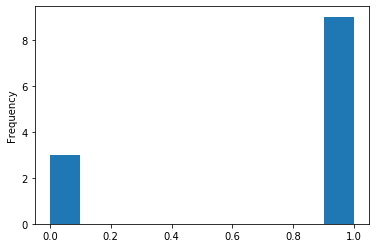

In [90]:
# this df is clearly a binomial distribution (one and zero are the only options)
coin_df['single_sample'].plot(kind='hist')

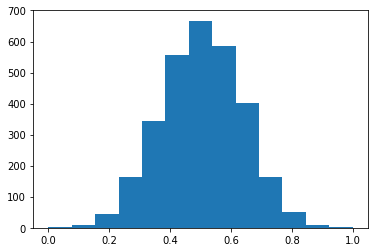

In [91]:
# now plot all 3000 sample means
plt.hist(sample_means, bins=13);

In [92]:
# is this a normal distribution?
normaltest(sample_means)

NormaltestResult(statistic=4.71578130705422, pvalue=0.09461959836279903)

What does the Central Limit Theorem State? That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

In [0]:
# let's pretend each sample included 100 coin flips, not just 12.
sample_means=[]
for x in range(3000):
  coinflips = np.random.binomial(1, .5, size=100)
  sample_means.append(coinflips.mean())
# the higher my sample size, the closer I get to .5!


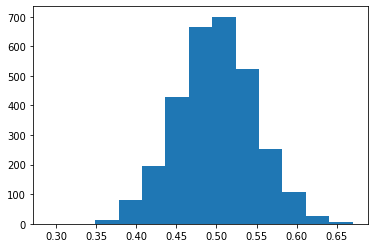

In [97]:
# when I plot, it gets a little taller and a little narrower!
plt.hist(sample_means, bins=13);

This outcome is what we call the Central Limit Theorem. No matter the distribution of my underlying data, the distribution of the estimates will be distributed normally.

In [0]:
# Compare sets of small and large samples


In [0]:
# Plot that for comparison: it gets taller, narrower, and more normal.


## Confidence Interval

![source](https://www.mathsisfun.com/data/images/ci95.gif)

With 95% confidence, the population mean is within these bounds. This is the [margin of error](https://www.monmouth.edu/polling-institute/reports/monmouthpoll_ia_111219/) we often seen in political polls.

Between the upper and lower bounds we can find 95% of the sample means.

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

s = standard deviation of the sample  
n = sample size  
t = test statistic  
X = sample mean
  
As sample size goes up, the standard error (i.e., the spread of our error) gets tighter.

In [0]:
# bring in the stats module (for the t-statistic)
import scipy.stats as stats

In [0]:
# define our own function for calculating confidence interval

def confidence_interval(data, confidence=0.95):
    """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
    """
    
    data_array = np.array(data)
    data_mean = np.mean(data)
    n = len(data)

    stderr = np.std(data_array, ddof=1)/np.sqrt(n)
    moe = stderr * stats.t.ppf((1 + confidence) / 2, n-1) # loop up the corresponding tstat

    return (data_mean, data_mean - moe, data_mean + moe)

    

In [101]:
# what's the conf interval for a sample of 500 coin flips?
coinflips = np.random.binomial(1, .5, size=500)

confidence_interval(coinflips)

# mean, upper bound, lower bound.
# We are 95% confindent the mean of our population is somewhere between .458 and .545

(0.502, 0.45802366836466524, 0.5459763316353348)

In [102]:
# try this again. It should capture the mean 95% of the time.
coinflips = np.random.binomial(1, .5, size=500)

confidence_interval(coinflips)

(0.474, 0.4300828132728252, 0.5179171867271748)

In [103]:
coinflips = np.random.binomial(1, .5, size=500)

confidence_interval(coinflips, confidence=.99)

(0.514, 0.4561463815840519, 0.5718536184159481)

We want the t-statistic that corresponds to the probability cut off for a given t distribution  (a distribution with a certain 'degrees of freedom').  
`stats.t.ppf` is just looking up the corresponding t-statistic.

**Degrees of freedom**  
degrees of freedom equals the number of "observations" minus the number of required relations among the observations (e.g., the number of parameter estimates). For a 1-sample t-test, one degree of freedom is spent estimating the mean, and the remaining n - 1 degrees of freedom estimate variability.
https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-degrees-of-freedom-in-statistics

**Looking at stats.t.ppf**

In [0]:
# stats.t.ppf(# probability cutoff, # degrees of freedom)

# 95% confidence level -> .025

# 1 - confidence_level == .05 / 2 -> .025



## Graphically Represent a Confidence Interval

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

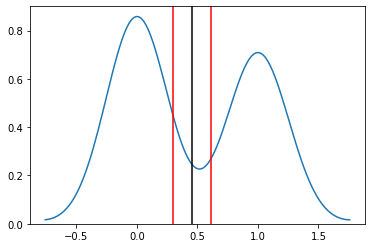

In [112]:
# fake data - one samle of 42 coin flips
coinflips_42 = np.random.binomial(1, .5, size=42)
# kernel density estimate
sns.kdeplot(coinflips_42)
CI = confidence_interval(coinflips_42)

plt.axvline(x=CI[0], color='k')
plt.axvline(x=CI[1], color='r')
plt.axvline(x=CI[2], color='r');


In [0]:
# fake data - 50 samples of 12 coin flips
sample_means=[]
for x in range(50):
  coinflips=np.random.binomial(1, .5, size=12)
  sample_means.append(coinflips.mean())

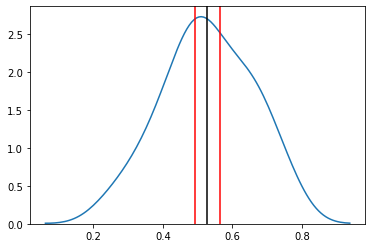

In [110]:
sns.kdeplot(sample_means)
CI = confidence_interval(sample_means)

plt.axvline(x=CI[0], color='k')
plt.axvline(x=CI[1], color='r')
plt.axvline(x=CI[2], color='r');

## Relationship between Confidence Intervals and T-tests

Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

In [0]:
from scipy.stats import t, ttest_1samp, ttest_ind

**Note that scipy has a built-in function to calculate the confidence interval**   
t.interval

In [0]:
flip_means=[]
for x in range(100):
  coinflips=np.random.binomial(1, .5, size=30)
  flip_means.append(coinflips.mean())

**Rebuild the earlier function**
but using `t.interval` instead.

In [0]:
# Sample Size
n = len(flip_means)
# Degrees of Freedom
dof = n-1
# The Mean of Means:
big_mean = np.mean(flip_means)
# Sample Standard Deviation
sample_std = np.std(flip_means, ddof=1)
# Standard Error
sample_stderr = sample_std / n**.5


In [122]:
'''You can roll your own CI calculation pretty easily. 
The only thing that's a little bit challenging 
is understanding the t stat lookup'''

# 95% confidence interval
CI = t.interval(.95, dof, loc=big_mean, scale=sample_stderr)
CI

(0.46764601576904896, 0.504353984230951)

A null hypothesis that's just inside of our confidence interval == fail to reject



In [123]:
# pick a value for my null hypothesis and check the p-value
ttest_1samp(flip_means, .49)
# fail to reject over 0.05, not a significant difference between .49 and population mean

Ttest_1sampResult(statistic=-0.43243296420896377, pvalue=0.6663672678831433)

In [124]:
# what if I pick a null hypothesis that's just outside of our confidence interval? 
ttest_1samp(flip_means, .51)
# reject under 0.05, significant difference between .51 and population mean

Ttest_1sampResult(statistic=-2.5945977852537823, pvalue=0.010907668464532996)

In [0]:
# I would only see this 5% of the time, so it's unlikely and I reject the null hypothesis.
# A comparison of what we EXPECT and what we OBSERVE.

## Chi Squared Test $\chi^{2}$

A test for dependence of categorical variables. (ie, are they correlated?)

In [125]:
# read back in the earlier data.
adult_df = pd.read_csv(url, na_values=' ?')
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [128]:
# just the categorical
adult_df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [133]:
# create some binned categories 
adult_df['hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [0]:
cut_points = [0, 9, 19, 29, 39, 49, 1000]
label_names = ['few', 'tens', 'twenties', 'thirties', 'forties', 'fifty+']

adult_df['hours-per-week-cats']= pd.cut(adult_df['hours-per-week'], cut_points, labels=label_names)

In [136]:
adult_df['hours-per-week-cats'].value_counts().sort_index()

few           458
tens         1246
twenties     2392
thirties     3667
forties     18336
fifty+       6462
Name: hours-per-week-cats, dtype: int64

In [137]:
# sex
adult_df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [139]:
# crosstab
x_table = pd.crosstab(adult_df['sex'], adult_df['hours-per-week-cats'], margins=True)
x_table

hours-per-week-cats,few,tens,twenties,thirties,forties,fifty+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


In [141]:
# create a set of female counts
f_count = x_table.iloc[0][0:6].values
f_count

array([ 235,  671, 1287, 1914, 5636, 1028])

In [142]:
# create a set of male counts
m_count = x_table.iloc[1][0:6].values
m_count

array([  223,   575,  1105,  1753, 12700,  5434])

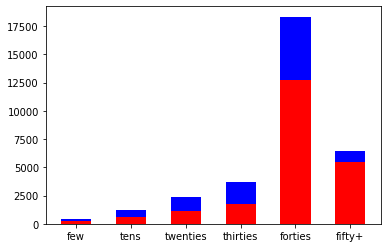

In [149]:
#Plots the bar chart
p1 = plt.bar(label_names, m_count, 0.55, color='r')
p2 = plt.bar(label_names, f_count, 0.55, color='b', bottom=m_count);


## Expected Value Calculation
\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}

In [152]:
x_table

hours-per-week-cats,few,tens,twenties,thirties,forties,fifty+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


In [154]:
row_sums = x_table.iloc[0:2, 6].values
column_sums = x_table.iloc[2, 0:6].values

print(row_sums)
print(column_sums)


[10771 21790]
[  458  1246  2392  3667 18336  6462]


In [156]:
total = x_table.loc['All', 'All']
total

32561

In [157]:
adult_df.shape[0]

32561

In [158]:
expected = []
for i in range(len(row_sums)):
  expected_row=[]
  for column in column_sums:
    expected_val = column * row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
expected

array([[  151.50388502,   412.16995793,   791.26046497,  1213.02346365,
         6065.44811277,  2137.59411566],
       [  306.49611498,   833.83004207,  1600.73953503,  2453.97653635,
        12270.55188723,  4324.40588434]])

## Chi-Squared Statistic with Numpy

\begin{align}
\chi^2 = \sum \frac{(observed_{i}-expected_{i})^2}{(expected_{i})}
\end{align}

For the $observed$ values we will just use a version of our contingency table without the margins as a numpy array. In this way, if our observed values array and our expected values array are the same shape, then we can subtract them and divide them directly which makes the calculations a lot cleaner. No for loops!

In [0]:
observed = pd.crosstab(adult_df['sex'], adult_df['hours-per-week-cats']).values

In [168]:
# Array broadcasting will work with numpy arrays but not python lists
chi_squared_stat = ((observed - expected)**2 / (expected)).sum()
chi_squared_stat

2287.190943926107

In [171]:
# Degrees of Freedom of a Chi-squared test

#degrees_of_freedom = (num_rows - 1)(num_columns - 1)
dof = (len(row_sums)-1) * (len(column_sums)-1)

# Calculate Degrees of Freedom
dof

5

## Run a $\chi^{2}$ Test using Scipy

Null Hypothesis: Hours worked per week bins is **independent** of sex. 

Due to a p-value of 0, we REJECT the null hypothesis that hours worked per week and sex are independent, and conclude that there is an association between hours worked per week and sex.

In [172]:
stats.chi2_contingency(observed)
# chi_squared_stat, pvalue, dof, expected_values

(2287.190943926107,
 0.0,
 5,
 array([[  151.50388502,   412.16995793,   791.26046497,  1213.02346365,
          6065.44811277,  2137.59411566],
        [  306.49611498,   833.83004207,  1600.73953503,  2453.97653635,
         12270.55188723,  4324.40588434]]))

### Another example

In [176]:
# sex and salary
observed = pd.crosstab(adult_df['sex'], adult_df['salary']).values
observed

array([[ 9592,  1179],
       [15128,  6662]])

In [177]:
# chi square test
stats.chi2_contingency(observed)
# since pvalue<0.05 in the population there is a pay difference

(1517.813409134445, 0.0, 1, array([[ 8177.24025675,  2593.75974325],
        [16542.75974325,  5247.24025675]]))

In [0]:
# age and salary

In [0]:
# crosstab

In [0]:
# chi square test